In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

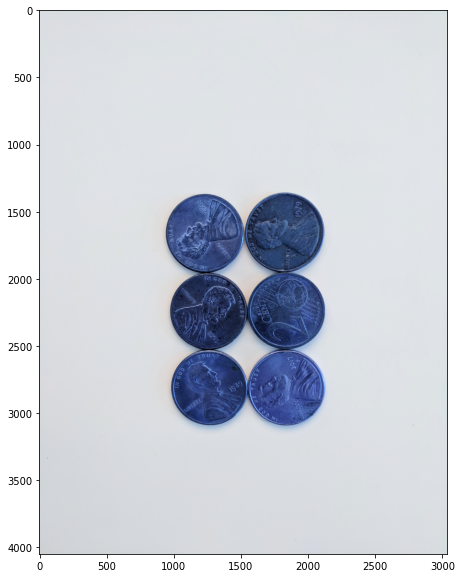

In [3]:
sep_coins = cv2.imread('DATA/pennies.jpg')
display(sep_coins)

## SEGMENTING THE IMAGE INTO 7 SEGMENTS - 6Coins and 1Background
### MedianBlur   
### GrayScale  
### Threshold 
### FindContours

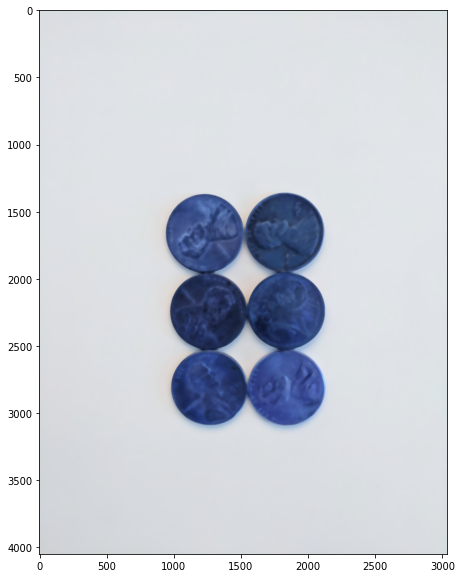

In [4]:
### MedianBlur  
sep_blur = cv2.medianBlur(sep_coins, 25)
display(sep_blur)

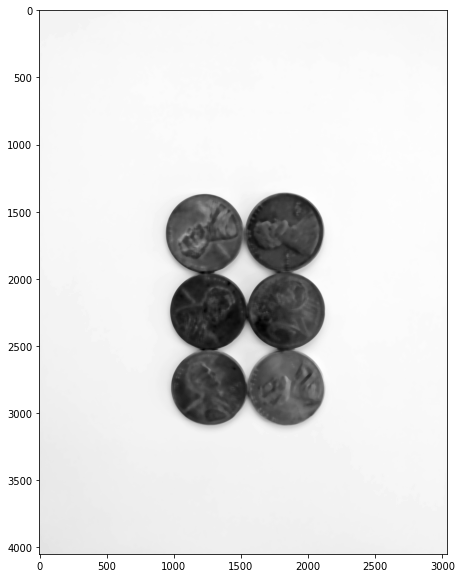

In [5]:
### GrayScale
gray_sep_coins = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)
display(gray_sep_coins)

127.0


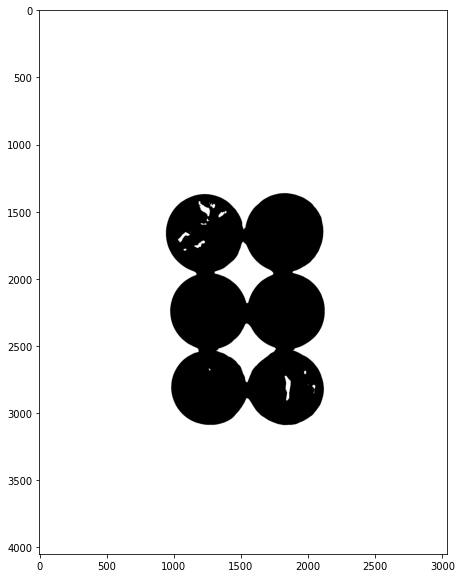

In [6]:
### Threshold 
ret, sep_thresh = cv2.threshold(gray_sep_coins, 127, 255, cv2.THRESH_BINARY)
print(ret)
display(sep_thresh)

160.0


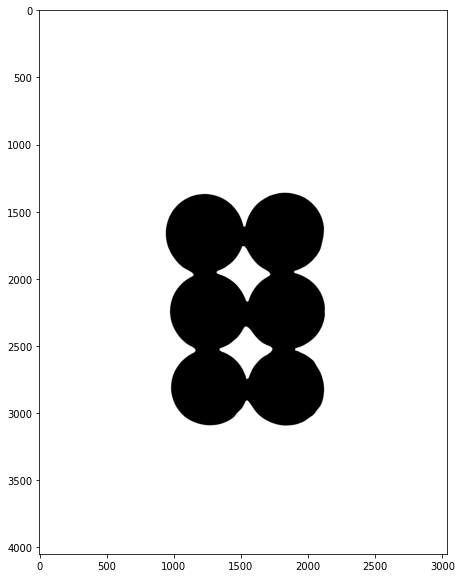

In [7]:
ret, sep_thresh = cv2.threshold(gray_sep_coins, 160, 255, cv2.THRESH_BINARY)
print(ret)
display(sep_thresh)

160.0


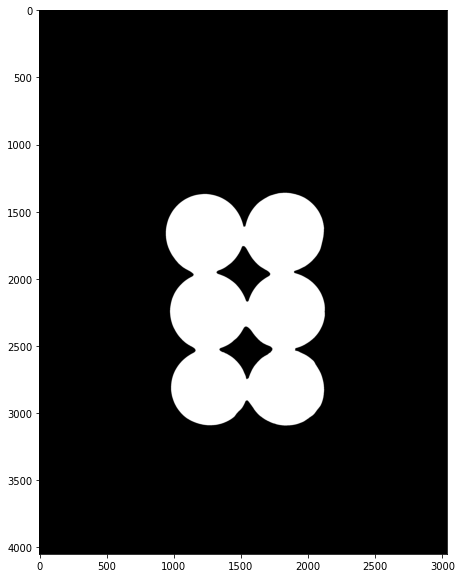

In [8]:
ret, sep_thresh = cv2.threshold(gray_sep_coins, 160, 255, cv2.THRESH_BINARY_INV)
print(ret)
display(sep_thresh)

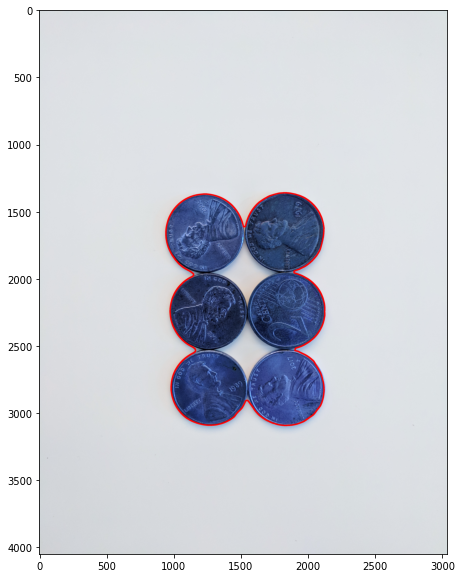

In [9]:
# Contours

image, contours, hierarchy = cv2.findContours(sep_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255,0,0),10)
        
display(sep_coins)

In [10]:
##NOTE: If we see the contours, they are not acheived fully, therefore we move to:

## WATERSHED ALGORITHM

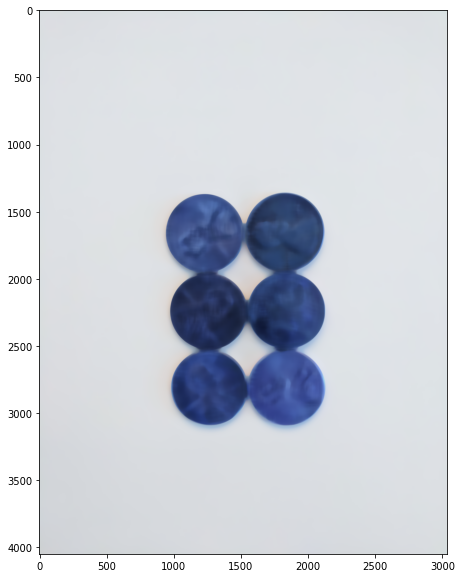

In [33]:
img = cv2.imread('DATA/pennies.jpg')
img = cv2.medianBlur(img, 53)
display(img)

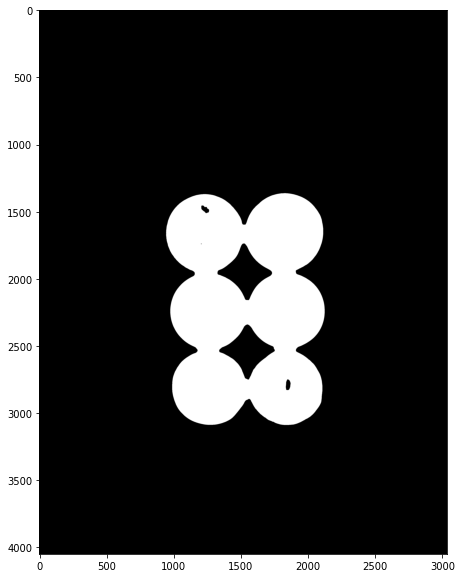

In [34]:
## Convert to Gray Scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## Apply a Threshold on Gray Scale
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

display(thresh)

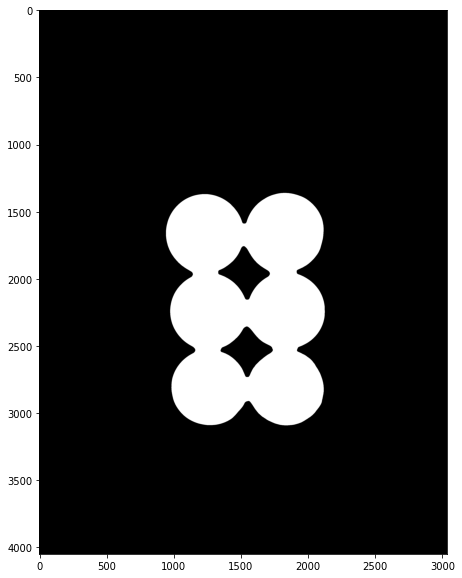

In [35]:
## Convert to Gray Scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## Apply a Threshold on Gray Scale
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


display(thresh)

## NOISE REMOVAL

In [36]:
kernel = np.ones((3,3), np.uint8)
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

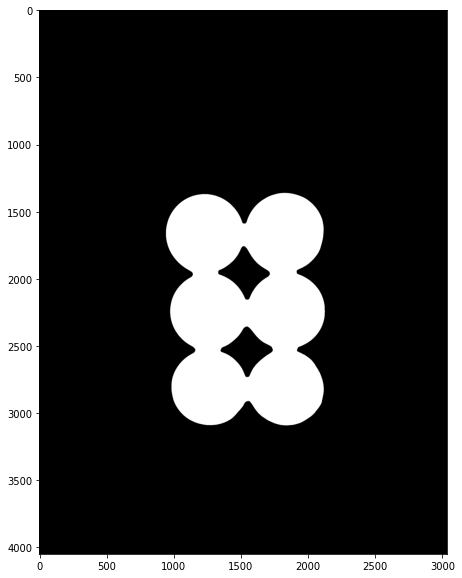

In [37]:
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
display(opening)

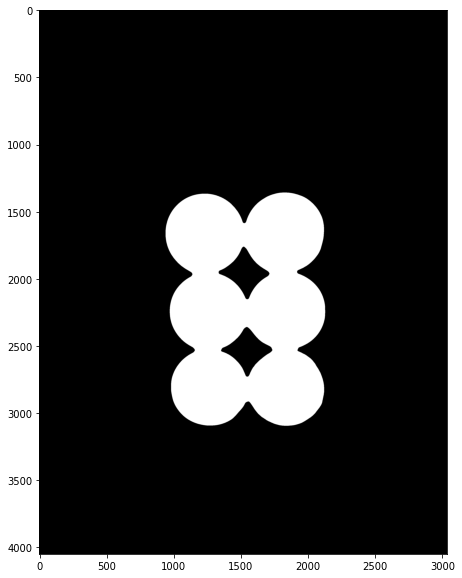

In [52]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)
display(sure_bg)

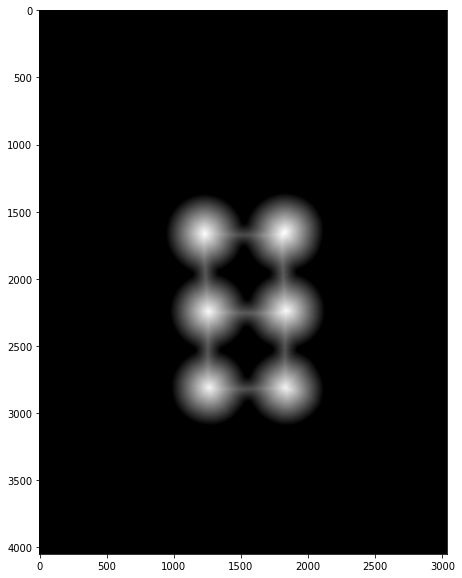

In [38]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
display(dist_transform)

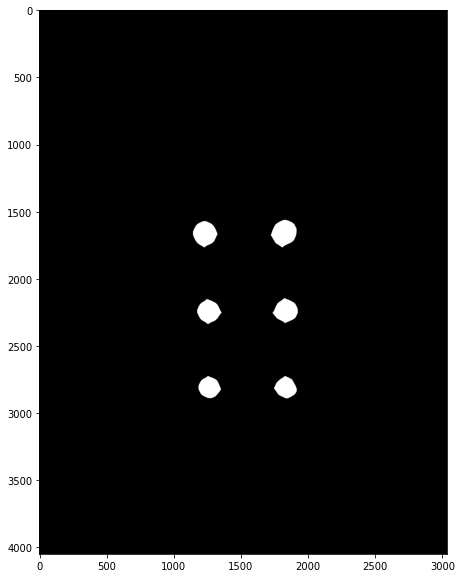

In [39]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
display(sure_fg)

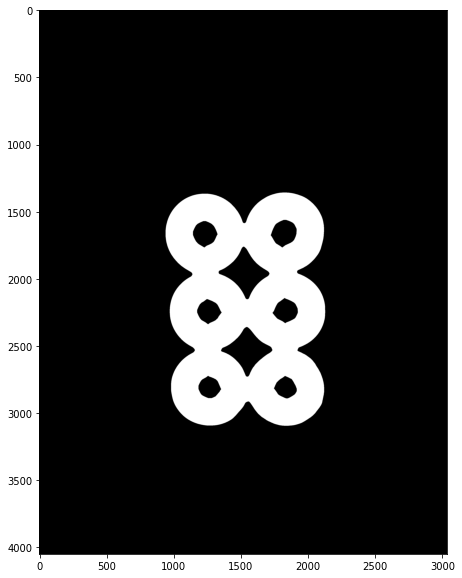

In [53]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
display(unknown)

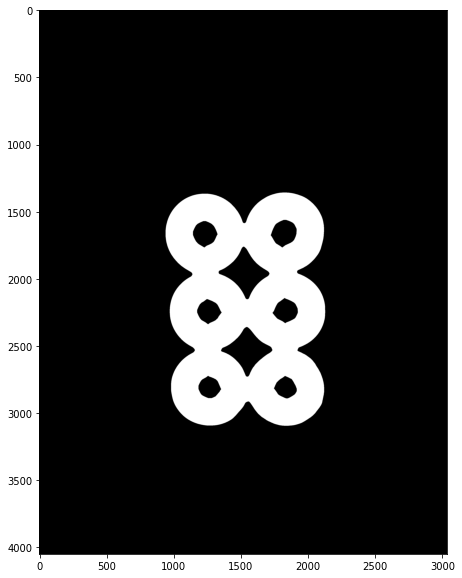

In [44]:
ret, markers = cv2.connectedComponents(sure_fg)
ret

7

In [45]:
markers

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [46]:
markers = markers + 1
markers

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

In [47]:
markers[unknown == 255] = 0
markers

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

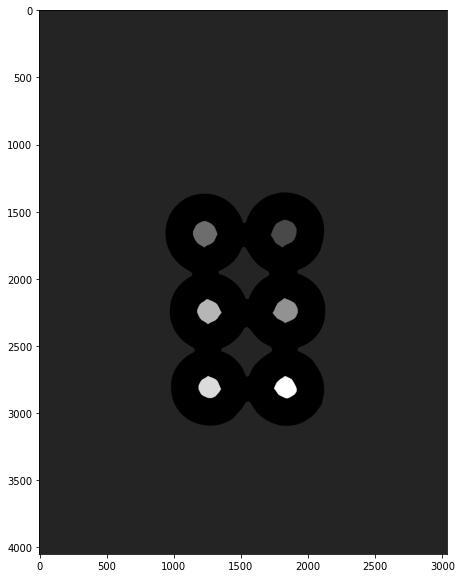

In [48]:
display(markers)

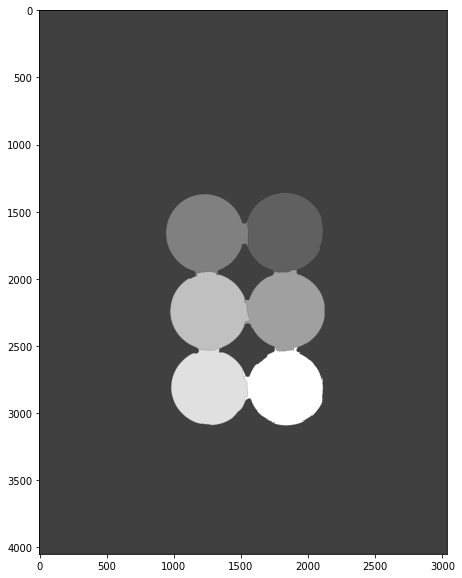

In [49]:
##WATERSHED ALGORITHMM TO MARKER

markers = cv2.watershed(img, markers)
display(markers)

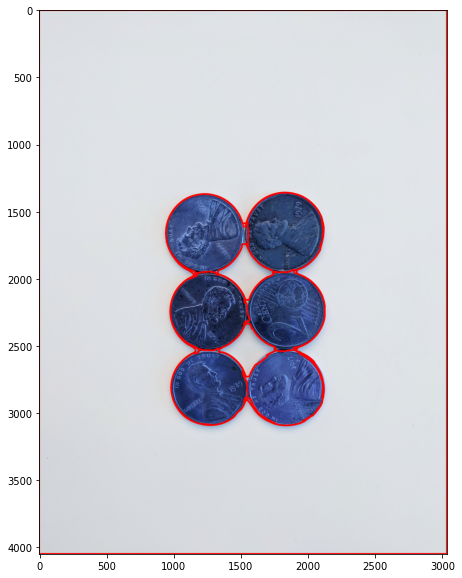

In [51]:
# Contours

image, contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255,0,0),10)
        
display(sep_coins)